<a href="https://colab.research.google.com/github/haleelsada/Dogeship/blob/main/Dogeship_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine learning model to predict the future price of doge coin based on past data

In [141]:
#import needed modules
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('/content/DOGE-USD.csv')
print(data.head())
print('\nshape of data is ',data.shape)

         Date      Open      High       Low     Close  Adj Close     Volume
0  2014-09-17  0.000293  0.000299  0.000260  0.000268   0.000268  1463600.0
1  2014-09-18  0.000268  0.000325  0.000267  0.000298   0.000298  2215910.0
2  2014-09-19  0.000298  0.000307  0.000275  0.000277   0.000277   883563.0
3  2014-09-20  0.000276  0.000310  0.000267  0.000292   0.000292   993004.0
4  2014-09-21  0.000293  0.000299  0.000284  0.000288   0.000288   539140.0

shape of data is  (2639, 7)


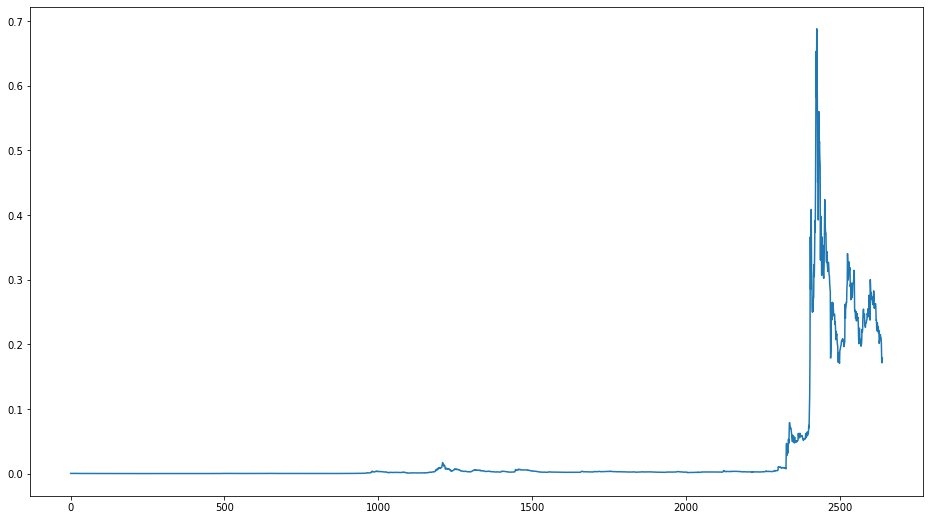

In [142]:
#try to visualise the data
plt.figure(figsize=(16,9))
plt.plot(data['Open'])

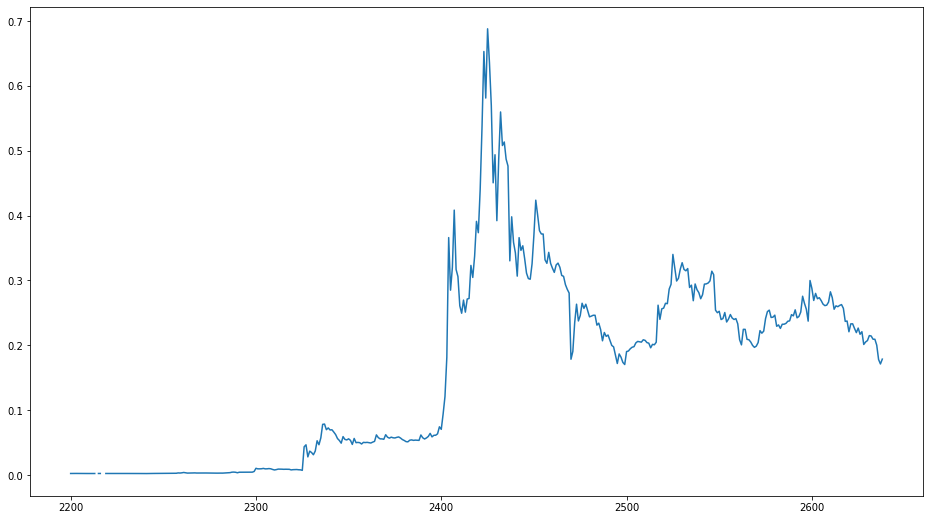

In [143]:
#zoom the last few years
plt.figure(figsize=(16,9))

plt.plot(data['Open'][2200:])

In [144]:
#make a copy of data and change date to numbers with first day 0
data2=data.copy()
data2['Date']=range(len(data2))
print('shape of data is ',data2.shape)
data2.tail()



shape of data is  (2639, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
2634,2634,0.209463,0.211991,0.193274,0.199993,0.199993,1.260948e+09
2635,2635,0.200356,0.200562,0.132826,0.178853,0.178853,4.388514e+09
2636,2636,0.178263,0.181133,0.162949,0.171255,0.171255,1.645331e+09
2637,2637,0.171383,0.180527,0.159558,0.178400,0.178400,1.896979e+09
2638,2638,0.178849,0.181907,0.177588,0.181001,0.181001,1.569108e+09


In [145]:
#checking for null cells and remove if any available
print('before null removal\n')
print(data2.isnull().sum())
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
data2=pd.DataFrame(imputer.fit_transform(data2))
print('\nafter null removal..\n')
print(data2.isnull().sum())

data2.columns=['Date','Open','High','Low','Close','Adj Close','Volume']
data2=data2.drop(columns=['Adj Close']) #droping this column since its almost same as Close value

before null removal

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

after null removal..

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [146]:
#make model

#split data
train = data2[:2000]
valid = data2[2000:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

#predict on validation data
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)

0.008045363923604892


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


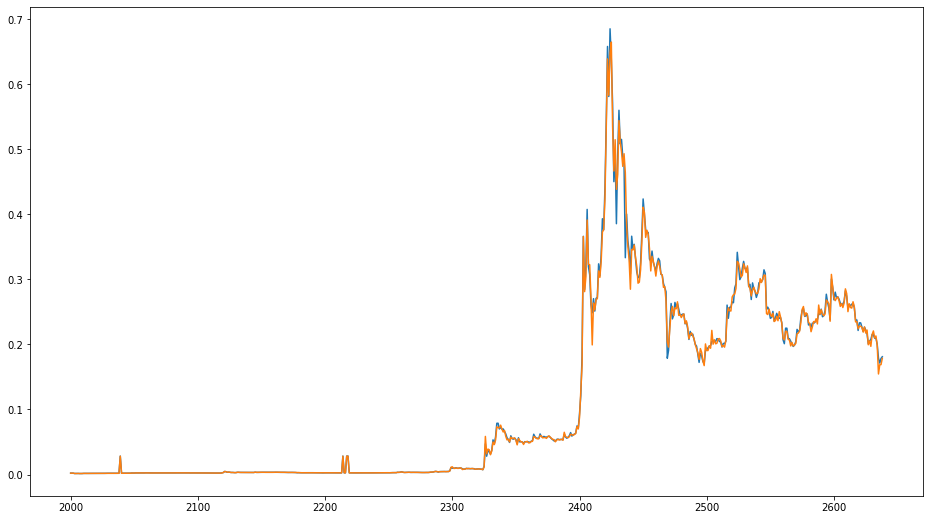

In [147]:
valid['Predictions'] = preds

plt.figure(figsize=(16,9))

plt.plot(valid[['Close','Predictions']])



In [148]:
#testing on a row from validation set

print('the prediction is ',(model.predict(data2[2600:2601].drop(columns=['Close'])))[0])

print('this original value is ',data2['Close'][2600:2601].iloc[0])

the prediction is  0.27181175093822374
this original value is  0.268345


In [149]:
newn=np.array([[3000,0.1387,0.1465,0.1384,677633300]])
print('predicted value is ',model.predict(newn)[0])

print('the real value is 0.1409')

predicted value is  0.14308819072442192
the real value is 1409


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [152]:
#to save the model
import joblib
joblib.dump(model,'linear_model')

#to load model again
#model=joblib.load('model.joblib')

['linear_model']